In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd
from pyrsimg import readTiff
from matplotlib.colors import LinearSegmentedColormap


In [5]:
path_region = 'data/vector/hma_tb_interior.gpkg'
path_dem_region = 'data/dem/dem_tb_interior.tif' 


In [6]:
hma_region = gpd.read_file(path_region)
dem_region = readTiff(path_dem_region)



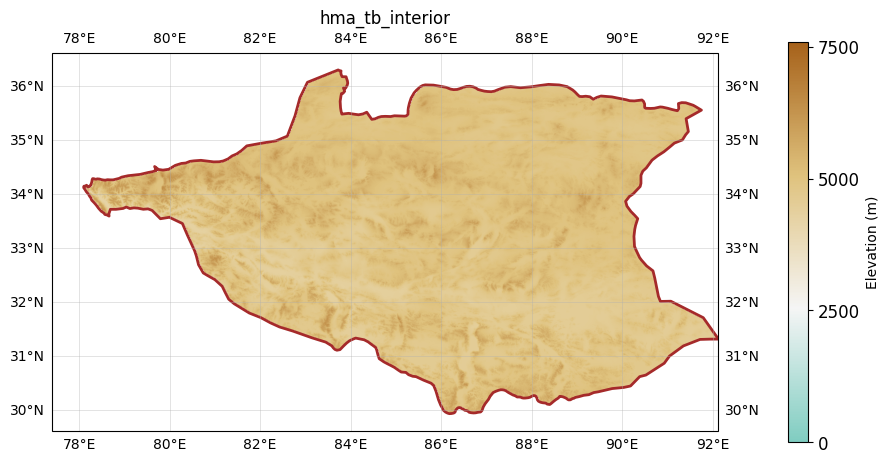

In [10]:
### visualize dem 
colors = [(128/255, 205/255, 193/255), (245/255, 245/255, 245/255), \
          (223/255, 194/255, 125/255), (166/255, 97/255, 26/255)]
cmap_dem = LinearSegmentedColormap.from_list('linear color', colors)

name_region = path_region.split('.')[0].split('/')[-1]
### visualize dem 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
dem_region.array[dem_region.array==0]=['nan']
ax_img = ax.imshow(dem_region.array, cmap=cmap_dem, clim=[0, 7600], alpha=1, extent=dem_region.geoextent)
ax.set_title(name_region)
### Visualize vector
hma_region.plot(ax=ax, edgecolor='brown', facecolor='none', linewidth=2)
gridl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.tick_params(labelbottom=True,  labeltop=True, labelleft=True, labelright=True,
                     bottom=True, top=True,      left=True, right=True)                     
gridl.xlabel_style = {'size': 10}
gridl.ylabel_style = {'size': 10}
### color bar
cbar = fig.colorbar(ax_img, ax=ax, fraction=0.05, pad=0.09, label='Elevation (m)', shrink=0.65, ticks=[0, 2500, 5000, 7500])
cbar.ax.tick_params(labelsize=12)
# scale_bar(ax, length=100, location=(0.15, 0.1), linewidth=1)

